In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats

In [ ]:
counts_df = pd.read_csv('/home/jiguo/data/data/reverse_stranded/counts/filtered_annotated_counts.txt',sep='\t', index_col=0)
sample_info = pd.read_csv('/home/jiguo/data/data/reverse_stranded/counts/sample_metadata.csv', index_col=0)

In [3]:
sample_info

,cell_line,condition,replicate
sample_id,,,
rep1_0,HeLa,with_centrioles,1
rep1_1,HeLa,with_centrioles,2
rep2_0,RPE-p53KO,with_centrioles,1
rep2_1,RPE-p53KO,with_centrioles,2
rep3_0,KE37-WT,with_centrioles,1
rep3_1,KE37-WT,with_centrioles,2
control,RPE-SAS6KO,without_centrioles,1


In [4]:
# keep genes with at least 10 counts in at least 2 samples
keep = (counts_df>=10).sum(axis=1) >= 2
counts_filtered = counts_df[keep]
print(f'filtered from {counts_df.shape[0]} to {counts_filtered.shape[0]} genes')

filtered from 67176 to 31352 genes


In [5]:
cpm_before = counts_df.div(counts_df.sum(axis=0), axis=1) * 1e6
cpm_after = counts_filtered.div(counts_filtered.sum(axis=0), axis=1) * 1e6

# Calculate mean expression per gene
mean_expr_before = cpm_before.mean(axis=1)
mean_expr_after = cpm_after.mean(axis=1)


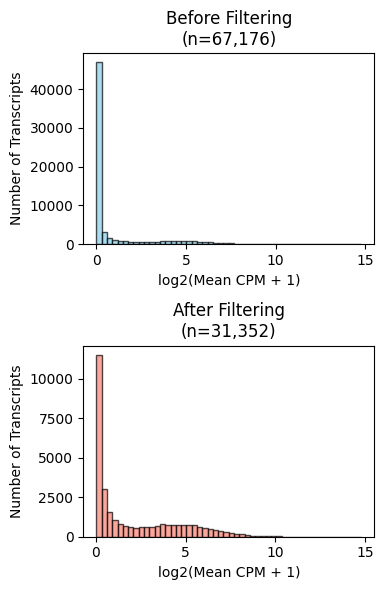

In [6]:
# vertically arrange the plots
fig, axes = plt.subplots(2, 1, figsize=(4,6))

axes[0].hist(np.log2(mean_expr_before + 1), bins=50, color='skyblue', edgecolor='black', alpha=0.7)
axes[0].set_title('Before Filtering\n(n={:,})'.format(len(mean_expr_before)))
axes[0].set_xlabel('log2(Mean CPM + 1)')
axes[0].set_ylabel('Number of Transcripts')

axes[1].hist(np.log2(mean_expr_after + 1), bins=50, color='salmon', edgecolor='black', alpha=0.7)
axes[1].set_title('After Filtering\n(n={:,})'.format(len(mean_expr_after)))
axes[1].set_xlabel('log2(Mean CPM + 1)')
axes[1].set_ylabel('Number of Transcripts')

plt.tight_layout()
plt.savefig('filtering_comparison_log.png', dpi=300, bbox_inches='tight')
plt.show()

### Make log transformed datamatrix for further visualization

In [7]:
cpm_after

,rep1_0,rep1_1,rep3_1,control,rep2_1,rep2_0,rep3_0
Geneid,,,,,,,
ENSG00000310526.1,0.771689,0.534115,2.618125,0.303807,0.190894,0.216513,14.112671
ENSG00000241860.8,0.056861,0.005869,0.130498,0.000000,0.000000,0.006014,0.612356
ENSG00000310527.1,0.162461,0.375641,3.784454,0.290305,0.327246,0.252598,16.462410
ENSG00000292994.2,0.016246,0.023478,0.350715,0.033756,0.040906,0.096228,0.583874
ENSG00000290385.2,0.560490,0.064563,1.818822,0.094518,0.068176,0.072171,2.919372
...,...,...,...,...,...,...,...
ENSG00000307470.1,0.438644,0.346294,0.301778,0.040508,0.081812,0.036085,0.754764
ENSG00000299314.1,0.081230,0.058694,0.032625,0.006751,0.000000,0.000000,0.227853
ENSG00000293753.1,0.129969,0.117388,0.016312,0.000000,0.000000,0.000000,0.000000


In [8]:
counts_df = counts_filtered

In [9]:
library_sizes = counts_df.sum(axis=0)
cpm = counts_df.div(library_sizes, axis=1) * 1e6 # axis =1 meaning column-wise division
log_cpm=np.log2(cpm + 1)  # define log-cpm for later data visualization
print("library sizes:\n", library_sizes)

library sizes:
 rep1_0     123106569
rep1_1     170375388
rep3_1     122606848
control    148120203
rep2_1     146678500
rep2_0     166271988
rep3_0      70220583
dtype: int64


In [10]:
log_cpm

,rep1_0,rep1_1,rep3_1,control,rep2_1,rep2_0,rep3_0
Geneid,,,,,,,
ENSG00000310526.1,0.825125,0.617406,1.855242,0.382731,0.252045,0.282751,3.917687
ENSG00000241860.8,0.079786,0.008443,0.176959,0.000000,0.000000,0.008651,0.689170
ENSG00000310527.1,0.217182,0.460104,2.258354,0.367712,0.408436,0.324924,4.126181
ENSG00000292994.2,0.023250,0.033479,0.433723,0.047896,0.057840,0.132548,0.663458
ENSG00000290385.2,0.641999,0.090262,1.495092,0.130295,0.095150,0.100535,1.970622
...,...,...,...,...,...,...,...
ENSG00000307470.1,0.524710,0.428994,0.380483,0.057288,0.113449,0.051143,0.811277
ENSG00000299314.1,0.112674,0.082286,0.046316,0.009707,0.000000,0.000000,0.296138
ENSG00000293753.1,0.176283,0.160130,0.023344,0.000000,0.000000,0.000000,0.000000


## For RPE-1 cells variation between 2 replicates

In [11]:
replicate_1 = sample_info[
    (sample_info['replicate'] == 1) &
    (sample_info['cell_line'] == 'RPE-p53KO')
].index

replicate_2 = sample_info[
    (sample_info['replicate'] == 2) &
    (sample_info['cell_line'] == 'RPE-p53KO')
].index

# use CPM values
rep1_expr = log_cpm[replicate_1[0]]  # Get the single column as a Series
rep2_expr = log_cpm[replicate_2[0]]  # Get the single column as a Series

# calculate mean expression and fold change
fold_change = rep1_expr - rep2_expr
mean_expr = (rep1_expr + rep2_expr) / 2

In [12]:
from scipy.stats import gaussian_kde
# calculate the point density
xy = np.vstack([mean_expr, fold_change])
z = gaussian_kde(xy)(xy)

In [13]:
# save the list of significant genes
significant_genes = fold_change[(np.abs(fold_change) >= 1) & (mean_expr >= 5)]
# also save the mean expression values
significant_genes = pd.DataFrame({
    'Log2_Fold_Change': significant_genes,
    'Mean_Expression': mean_expr[significant_genes.index]
})
significant_genes.to_csv('/home/jiguo/SeqAna_Pipe/reverse_stranded_significant_genes_RPE-rep1_vs_rep2.txt', sep='\t', header=True)

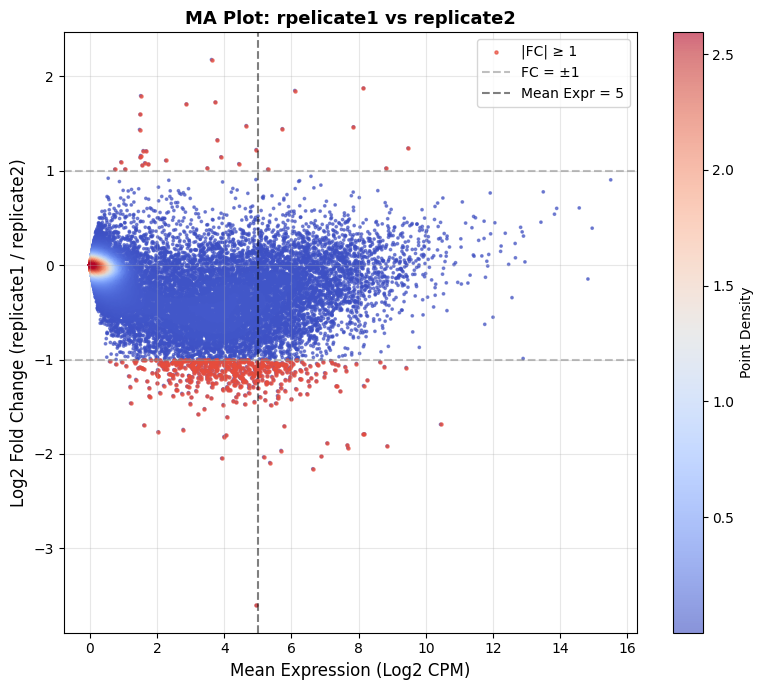

In [14]:
fig, ax1 = plt.subplots(1, 1, figsize=(8, 7))


idx = z.argsort()
x, y, z_sorted = mean_expr.iloc[idx], fold_change.iloc[idx], z[idx]

scatter = ax1.scatter(x, y, c=z_sorted, s=3, cmap='coolwarm', alpha=0.6)
# highlight the significant points
significant = fold_change.abs() >= 1
ax1.scatter(mean_expr[significant], fold_change[significant], 
            color='#E74C3C', s=5, alpha=0.7, label='|FC| ≥ 1')
plt.colorbar(scatter, ax=ax1, label='Point Density')

ax1.axhline(1, color='gray', linestyle='--', linewidth=1.5, alpha=0.5, label='FC = ±1')
ax1.axhline(-1, color='gray', linestyle='--', linewidth=1.5, alpha=0.5)
# show the threshold lines x >= 5 , y >= 1
ax1.axvline(5, color='black', linestyle='--', linewidth=1.5, alpha=0.5, label='Mean Expr = 5')
ax1.set_xlabel('Mean Expression (Log2 CPM)', fontsize=12)
ax1.set_ylabel('Log2 Fold Change (replicate1 / replicate2)', fontsize=12)
ax1.set_title('MA Plot: rpelicate1 vs replicate2', fontsize=13, fontweight='bold')
ax1.legend()
ax1.grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

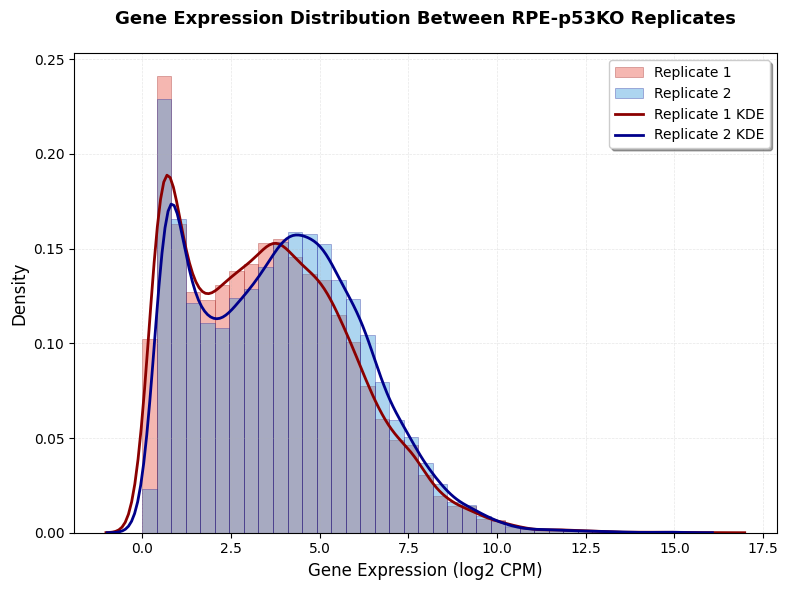

In [15]:
# Advanced histogram with KDE overlay
fig, ax = plt.subplots(figsize=(8, 6))

# Filter out very low expression for better visualization
expressed_mask = (rep1_expr > 0.5) | (rep2_expr > 0.5)
rep1_expressed = rep1_expr[expressed_mask]
rep2_expressed = rep2_expr[expressed_mask]

bins = np.linspace(0, max(rep1_expressed.max(), rep2_expressed.max()), 40)

# Histograms with density
ax.hist(rep1_expressed, bins=bins, alpha=0.4, label='Replicate 1',
        color='#E74C3C', edgecolor='darkred', linewidth=0.5, density=True)
ax.hist(rep2_expressed, bins=bins, alpha=0.4, label='Replicate 2',
        color='#3498DB', edgecolor='darkblue', linewidth=0.5, density=True)

# Add KDE overlay using seaborn
sns.kdeplot(data=rep1_expressed, color='darkred', linewidth=2, 
            label='Replicate 1 KDE', ax=ax)
sns.kdeplot(data=rep2_expressed, color='darkblue', linewidth=2,
            label='Replicate 2 KDE', ax=ax)

ax.set_xlabel('Gene Expression (log2 CPM)', fontsize=12)
ax.set_ylabel('Density', fontsize=12)
ax.set_title(f'Gene Expression Distribution Between RPE-p53KO Replicates\n', 
             fontsize=13, fontweight='bold')
ax.legend(loc='upper right', frameon=True, fancybox=True, shadow=True, fontsize=10)
ax.grid(alpha=0.3, linestyle='--', linewidth=0.5)

plt.tight_layout()
plt.show()


## difference between mean(RPE-rep_1, RPE-rep2) and control

In [16]:
centriole_sample = sample_info[
    (sample_info['cell_line'] == 'RPE-p53KO')
].index

control_sample = sample_info[
    (sample_info['condition'] == 'without_centrioles')
].index

# use CPM values
centriole_expr_mean = log_cpm[centriole_sample].mean(axis=1)
control_expr = log_cpm[control_sample[0]]  # Get the single column as a Series

# calculate mean expression and fold change
fold_change = centriole_expr_mean - control_expr
mean_expr = (centriole_expr_mean + control_expr) / 2

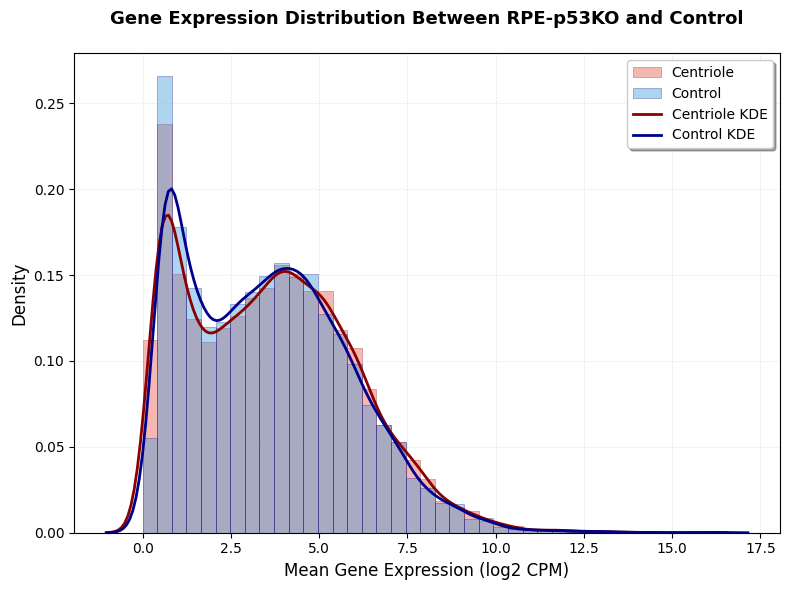

In [17]:
# Advanced histogram with KDE overlay
fig, ax = plt.subplots(figsize=(8, 6))

# Filter out very low expression for better visualization
expressed_mask = (centriole_expr_mean > 0.5) | (control_expr > 0.5)
centriole_expressed = centriole_expr_mean[expressed_mask]
control_expressed = control_expr[expressed_mask]

bins = np.linspace(0, max(centriole_expressed.max(), control_expressed.max()), 40)

# Histograms with density
ax.hist(centriole_expressed, bins=bins, alpha=0.4, label='Centriole',
        color='#E74C3C', edgecolor='darkred', linewidth=0.5, density=True)
ax.hist(control_expressed, bins=bins, alpha=0.4, label='Control',
        color='#3498DB', edgecolor='darkblue', linewidth=0.5, density=True)

# Add KDE overlay using seaborn
sns.kdeplot(data=centriole_expressed, color='darkred', linewidth=2, 
            label='Centriole KDE', ax=ax)
sns.kdeplot(data=control_expressed, color='darkblue', linewidth=2,
            label='Control KDE', ax=ax)

ax.set_xlabel('Mean Gene Expression (log2 CPM)', fontsize=12)
ax.set_ylabel('Density', fontsize=12)
ax.set_title(f'Gene Expression Distribution Between RPE-p53KO and Control\n', 
             fontsize=13, fontweight='bold')
ax.legend(loc='upper right', frameon=True, fancybox=True, shadow=True, fontsize=10)
ax.grid(alpha=0.3, linestyle='--', linewidth=0.5)

plt.tight_layout()
plt.show()


## Between HeLa replicates

In [18]:
replicate_1 = sample_info[
    (sample_info['replicate'] == 1) &
    (sample_info['cell_line'] == 'HeLa')
].index

replicate_2 = sample_info[
    (sample_info['replicate'] == 2) &
    (sample_info['cell_line'] == 'HeLa')
].index

# use CPM values
rep1_expr = log_cpm[replicate_1[0]]  # Get the single column as a Series
rep2_expr = log_cpm[replicate_2[0]]  # Get the single column as a Series

# calculate mean expression and fold change
fold_change = rep1_expr - rep2_expr
mean_expr = (rep1_expr + rep2_expr) / 2

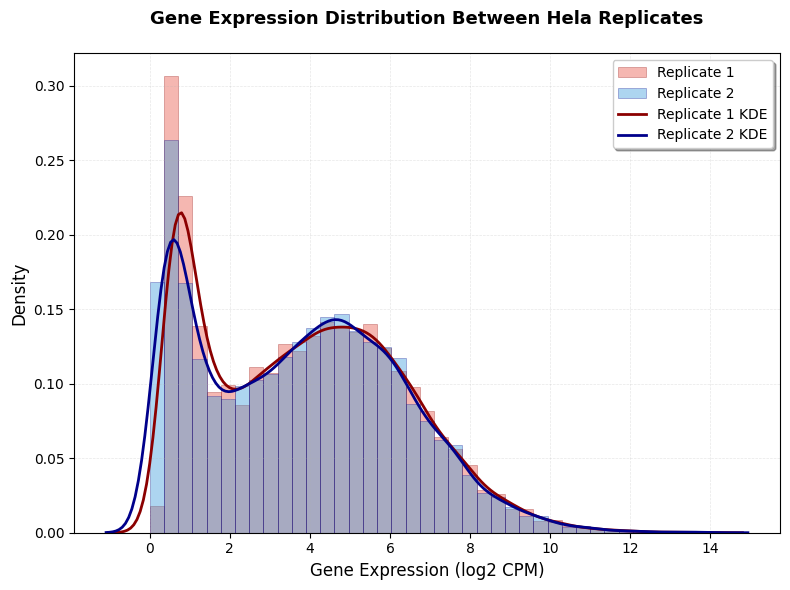

In [19]:
# Advanced histogram with KDE overlay
fig, ax = plt.subplots(figsize=(8, 6))

# Filter out very low expression for better visualization
expressed_mask = (rep1_expr > 0.5) | (rep2_expr > 0.5)
rep1_expressed = rep1_expr[expressed_mask]
rep2_expressed = rep2_expr[expressed_mask]

bins = np.linspace(0, max(rep1_expressed.max(), rep2_expressed.max()), 40) # define bins based on max expression

# Histograms with density
ax.hist(rep1_expressed, bins=bins, alpha=0.4, label='Replicate 1',
        color='#E74C3C', edgecolor='darkred', linewidth=0.5, density=True)
ax.hist(rep2_expressed, bins=bins, alpha=0.4, label='Replicate 2',
        color='#3498DB', edgecolor='darkblue', linewidth=0.5, density=True)

# Add KDE overlay using seaborn
sns.kdeplot(data=rep1_expressed, color='darkred', linewidth=2, 
            label='Replicate 1 KDE', ax=ax)
sns.kdeplot(data=rep2_expressed, color='darkblue', linewidth=2,
            label='Replicate 2 KDE', ax=ax)

ax.set_xlabel('Gene Expression (log2 CPM)', fontsize=12)
ax.set_ylabel('Density', fontsize=12)
ax.set_title(f'Gene Expression Distribution Between Hela Replicates\n', 
             fontsize=13, fontweight='bold')
ax.legend(loc='upper right', frameon=True, fancybox=True, shadow=True, fontsize=10)
ax.grid(alpha=0.3, linestyle='--', linewidth=0.5)

plt.tight_layout()
plt.show()


## Between KE37 replicates

In [20]:
replicate_1 = sample_info[
    (sample_info['replicate'] == 1) &
    (sample_info['cell_line'] == 'KE37-WT')
].index

replicate_2 = sample_info[
    (sample_info['replicate'] == 2) &
    (sample_info['cell_line'] == 'KE37-WT')
].index

# use CPM values
rep1_expr = log_cpm[replicate_1[0]]  # Get the single column as a Series
rep2_expr = log_cpm[replicate_2[0]]  # Get the single column as a Series

# calculate mean expression and fold change
fold_change = rep1_expr - rep2_expr
mean_expr = (rep1_expr + rep2_expr) / 2

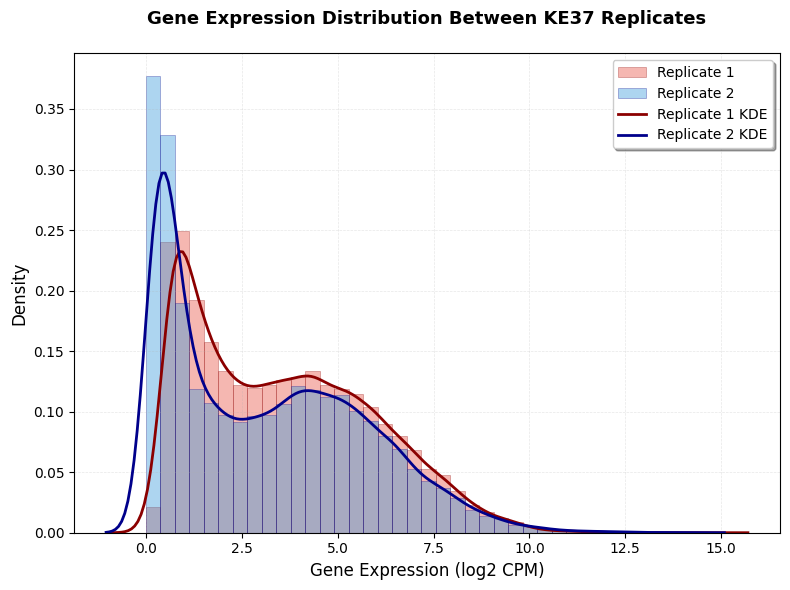

In [21]:
# Advanced histogram with KDE overlay
fig, ax = plt.subplots(figsize=(8, 6))

# Filter out very low expression for better visualization
expressed_mask = (rep1_expr > 0.5) | (rep2_expr > 0.5)
rep1_expressed = rep1_expr[expressed_mask]
rep2_expressed = rep2_expr[expressed_mask]

bins = np.linspace(0, max(rep1_expressed.max(), rep2_expressed.max()), 40)

# Histograms with density
ax.hist(rep1_expressed, bins=bins, alpha=0.4, label='Replicate 1',
        color='#E74C3C', edgecolor='darkred', linewidth=0.5, density=True)
ax.hist(rep2_expressed, bins=bins, alpha=0.4, label='Replicate 2',
        color='#3498DB', edgecolor='darkblue', linewidth=0.5, density=True)

# Add KDE overlay using seaborn
sns.kdeplot(data=rep1_expressed, color='darkred', linewidth=2, 
            label='Replicate 1 KDE', ax=ax)
sns.kdeplot(data=rep2_expressed, color='darkblue', linewidth=2,
            label='Replicate 2 KDE', ax=ax)

ax.set_xlabel('Gene Expression (log2 CPM)', fontsize=12)
ax.set_ylabel('Density', fontsize=12)
ax.set_title(f'Gene Expression Distribution Between KE37 Replicates\n', 
             fontsize=13, fontweight='bold')
ax.legend(loc='upper right', frameon=True, fancybox=True, shadow=True, fontsize=10)
ax.grid(alpha=0.3, linestyle='--', linewidth=0.5)

plt.tight_layout()
plt.show()


In [22]:
from scipy.stats import pearsonr, spearmanr
pearson_r, _ = pearsonr(rep1_expr, rep2_expr)
spearman_r, _ = spearmanr(rep1_expr, rep2_expr)

print(f"Pearson r = {pearson_r:.3f}")
print(f"Spearman r = {spearman_r:.3f}")

Pearson r = 0.954
Spearman r = 0.949


In [23]:
centriole_samples = sample_info[(sample_info['condition']=='with_centrioles') & (sample_info['cell_line']=='RPE-p53KO')].index
control_samples = sample_info[sample_info['condition']=='without_centrioles'].index
# use CPM values
centriole_counts = log_cpm[centriole_samples]
control_counts = log_cpm[control_samples]

# calculate mean expression and fold change
mean_centrioles = centriole_counts.mean(axis=1)
control_expr = control_counts.mean(axis=1)
fold_change = mean_centrioles - control_expr
mean_expr = (mean_centrioles + control_expr) / 2

In [24]:
from scipy.stats import gaussian_kde
# calculate the point density
xy = np.vstack([mean_expr, fold_change])
z = gaussian_kde(xy)(xy)

In [25]:
# save the list of significant genes
significant_genes = fold_change[(fold_change >= 1) & (mean_expr >= 5)]
# also save the mean expression values
significant_genes = pd.DataFrame({
    'Log2_Fold_Change': significant_genes,
    'Mean_Expression': mean_expr[significant_genes.index]
})
significant_genes.to_csv('/home/jiguo/SeqAna_Pipe/reverse_stranded_significant_genes_RPE-p53KO_vs_Control.txt', sep='\t', header=True)

In [26]:
# save the list of significant genes
significant_genes = fold_change[(fold_change >= 1) & (mean_expr >= 5)]
# also save the mean expression values
significant_genes = pd.DataFrame({
    'Log2_Fold_Change': significant_genes,
    'Mean_Expression': mean_expr[significant_genes.index]
})
significant_genes.to_csv('/home/jiguo/SeqAna_Pipe/upRegulated_genes_RPE-p53KO_vs_Control.txt', sep='\t', header=True)

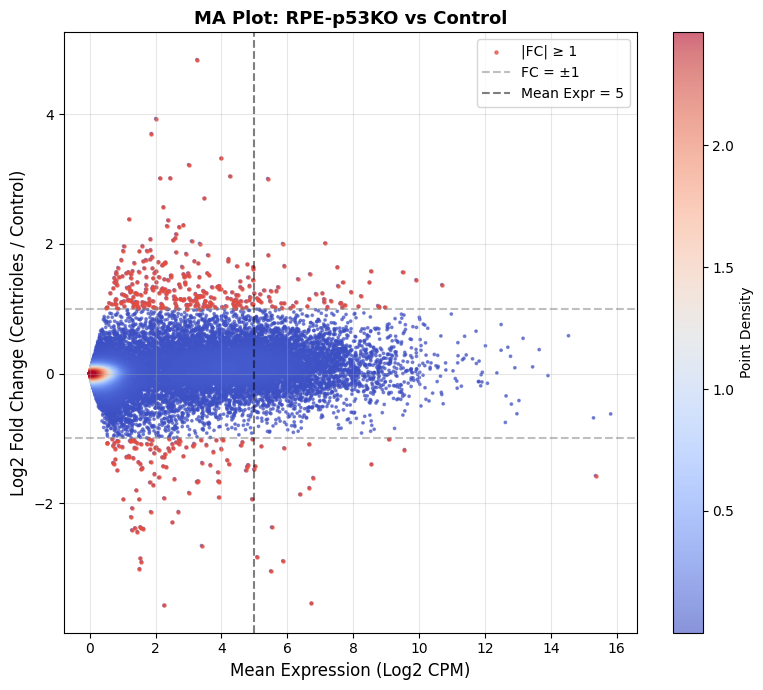

In [27]:

fig, ax1 = plt.subplots(1, 1, figsize=(8, 7))

# === MA Plot with Density ===
idx = z.argsort()
x, y, z_sorted = mean_expr.iloc[idx], fold_change.iloc[idx], z[idx]

scatter = ax1.scatter(x, y, c=z_sorted, s=3, cmap='coolwarm', alpha=0.6)
# highlight the significant points
significant = fold_change.abs() >= 1
ax1.scatter(mean_expr[significant], fold_change[significant], 
            color='#E74C3C', s=5, alpha=0.7, label='|FC| ≥ 1')
plt.colorbar(scatter, ax=ax1, label='Point Density')

ax1.axhline(1, color='gray', linestyle='--', linewidth=1.5, alpha=0.5, label='FC = ±1')
ax1.axhline(-1, color='gray', linestyle='--', linewidth=1.5, alpha=0.5)
# show the threshold lines x >= 5 , y >= 1
ax1.axvline(5, color='black', linestyle='--', linewidth=1.5, alpha=0.5, label='Mean Expr = 5')
ax1.set_xlabel('Mean Expression (Log2 CPM)', fontsize=12)
ax1.set_ylabel('Log2 Fold Change (Centrioles / Control)', fontsize=12)
ax1.set_title('MA Plot: RPE-p53KO vs Control', fontsize=13, fontweight='bold')
ax1.legend()
ax1.grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

In [28]:
from sklearn.decomposition import PCA
pca = PCA(n_components=2)
pca_result = pca.fit_transform(log_cpm.T)  # transpose to have samples as rows

In [59]:
# Create PCA fataframe
pca_df = pd.DataFrame(
    data=pca_result, 
    columns=['PC1', 'PC2'], 
    index=counts_filtered.columns)
pca_df = pca_df.join(sample_info)

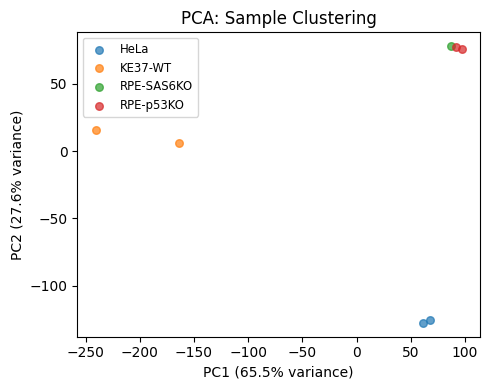

In [60]:
# Plot PCA
plt.figure(figsize=(5, 4))
for cellline in pca_df['cell_line'].unique():
    mask = pca_df['cell_line'] == cellline
    plt.scatter(pca_df.loc[mask, 'PC1'], 
                pca_df.loc[mask, 'PC2'],
                label=cellline, s=30, alpha=0.7)
plt.xlabel(f'PC1 ({pca.explained_variance_ratio_[0]:.1%} variance)')
plt.ylabel(f'PC2 ({pca.explained_variance_ratio_[1]:.1%} variance)')
plt.title('PCA: Sample Clustering')
plt.legend(loc='best', fontsize='small')

plt.tight_layout()
plt.show()

In [61]:
# investigate other PCA components
pca = PCA(n_components=7)
pca_result = pca.fit_transform(log_cpm.T)  # transpose to have samples as rows
# Create PCA fataframe
pca_df = pd.DataFrame(
    data=pca_result, 
    columns=['PC1', 'PC2', 'PC3', 'PC4', 'PC5', 'PC6', 'PC7'], 
    index=counts_filtered.columns)
pca_df = pca_df.join(sample_info)


In [62]:
pca_df

,PC1,PC2,PC3,PC4,PC5,PC6,PC7,cell_line,condition,replicate
rep1_0,61.083560,-127.495543,-7.958527,0.253339,9.451376,-20.750443,-1.704406e-13,HeLa,with_centrioles,1
rep1_1,68.156112,-125.014402,-0.438251,-0.689209,-9.338165,21.079569,-1.704406e-13,HeLa,with_centrioles,2
rep3_1,-163.656860,6.145008,69.304717,1.591209,2.829991,-0.625587,-1.704406e-13,KE37-WT,with_centrioles,2
control,86.801339,77.810291,-3.825932,-30.767030,17.715935,4.040634,-1.704406e-13,RPE-SAS6KO,without_centrioles,1
rep2_1,91.370111,76.950553,-8.077801,32.415678,14.362393,3.974957,-1.704406e-13,RPE-p53KO,with_centrioles,2
rep2_0,96.964705,75.750996,3.352607,-1.996738,-31.858603,-8.421011,-1.704406e-13,RPE-p53KO,with_centrioles,1
rep3_0,-240.718968,15.853097,-52.356813,-0.807248,-3.162927,0.701881,-1.704406e-13,KE37-WT,with_centrioles,1


In [32]:
pca_df.to_csv('/home/jiguo/SeqAna_Pipe/reverse_stranded_pca_results.txt', sep='\t', header=True)

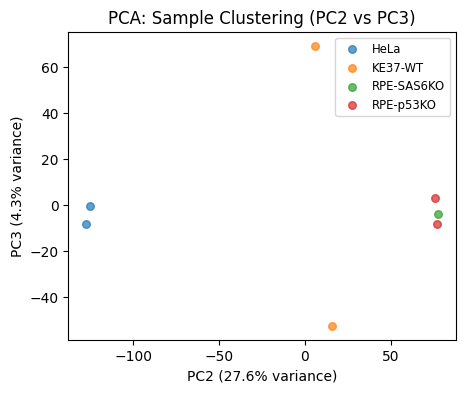

In [33]:
# plot PC2 vs PC3
plt.figure(figsize=(5, 4))
for cellline in pca_df['cell_line'].unique():
    mask = pca_df['cell_line'] == cellline
    plt.scatter(pca_df.loc[mask, 'PC2'], 
                pca_df.loc[mask, 'PC3'],
                label=cellline, s=30, alpha=0.7)
plt.xlabel(f'PC2 ({pca.explained_variance_ratio_[1]:.1%} variance)')
plt.ylabel(f'PC3 ({pca.explained_variance_ratio_[2]:.1%} variance)')
plt.title('PCA: Sample Clustering (PC2 vs PC3)')
plt.legend(loc='best', fontsize='small')    

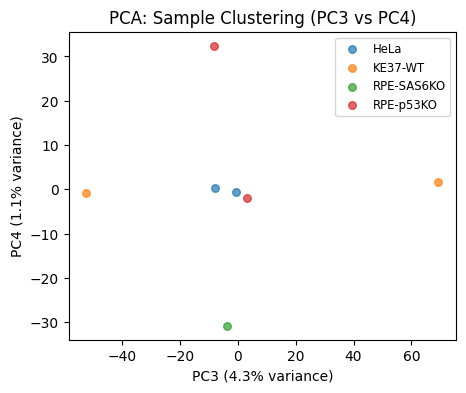

In [34]:
# pc3 vs pc4
plt.figure(figsize=(5, 4))
for cellline in pca_df['cell_line'].unique():
    mask = pca_df['cell_line'] == cellline
    plt.scatter(pca_df.loc[mask, 'PC3'], 
                pca_df.loc[mask, 'PC4'],
                label=cellline, s=30, alpha=0.7)
plt.xlabel(f'PC3 ({pca.explained_variance_ratio_[2]:.1%} variance)')
plt.ylabel(f'PC4 ({pca.explained_variance_ratio_[3]:.1%} variance)')
plt.title('PCA: Sample Clustering (PC3 vs PC4)')
plt.legend(loc='best', fontsize='small')

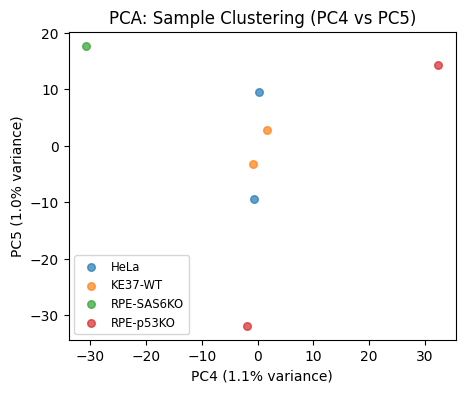

In [35]:
# pc4 vs pc5
plt.figure(figsize=(5, 4))
for cellline in pca_df['cell_line'].unique():
    mask = pca_df['cell_line'] == cellline
    plt.scatter(pca_df.loc[mask, 'PC4'], 
                pca_df.loc[mask, 'PC5'],
                label=cellline, s=30, alpha=0.7)
plt.xlabel(f'PC4 ({pca.explained_variance_ratio_[3]:.1%} variance)')
plt.ylabel(f'PC5 ({pca.explained_variance_ratio_[4]:.1%} variance)')
plt.title('PCA: Sample Clustering (PC4 vs PC5)')
plt.legend(loc='best', fontsize='small')

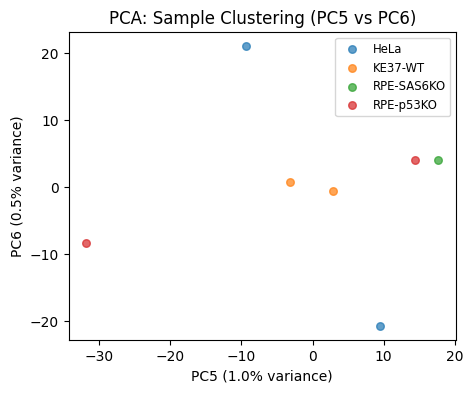

In [36]:
# pc5 vs pc6
plt.figure(figsize=(5, 4))
for cellline in pca_df['cell_line'].unique():
    mask = pca_df['cell_line'] == cellline
    plt.scatter(pca_df.loc[mask, 'PC5'], 
                pca_df.loc[mask, 'PC6'],
                label=cellline, s=30, alpha=0.7)
plt.xlabel(f'PC5 ({pca.explained_variance_ratio_[4]:.1%} variance)')
plt.ylabel(f'PC6 ({pca.explained_variance_ratio_[5]:.1%} variance)')
plt.title('PCA: Sample Clustering (PC5 vs PC6)')
plt.legend(loc='best', fontsize='small')

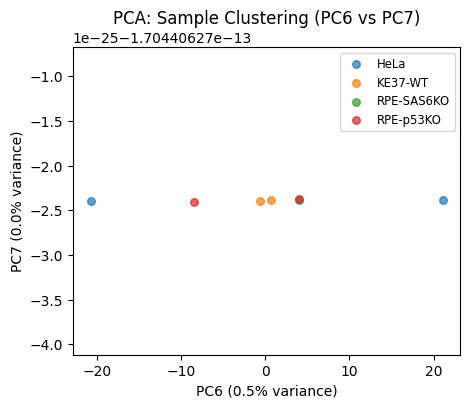

In [37]:
# pc6 vs pc7
plt.figure(figsize=(5, 4))
for cellline in pca_df['cell_line'].unique():
    mask = pca_df['cell_line'] == cellline
    plt.scatter(pca_df.loc[mask, 'PC6'], 
                pca_df.loc[mask, 'PC7'],
                label=cellline, s=30, alpha=0.7)
plt.xlabel(f'PC6 ({pca.explained_variance_ratio_[5]:.1%} variance)')
plt.ylabel(f'PC7 ({pca.explained_variance_ratio_[6]:.1%} variance)')
plt.title('PCA: Sample Clustering (PC6 vs PC7)')
plt.legend(loc='best', fontsize='small')

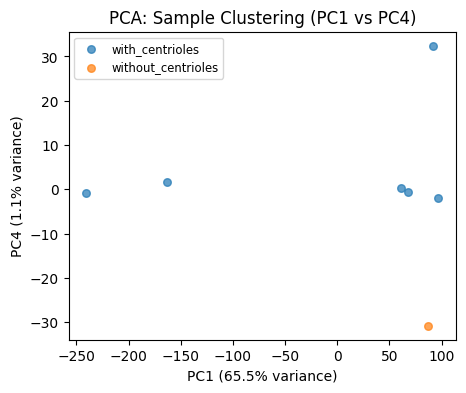

In [38]:
plt.figure(figsize=(5, 4))
for cellline in pca_df['condition'].unique():
    mask = pca_df['condition'] == cellline
    plt.scatter(pca_df.loc[mask, 'PC1'], 
                pca_df.loc[mask, 'PC4'],
                label=cellline, s=30, alpha=0.7)
plt.xlabel(f'PC1 ({pca.explained_variance_ratio_[0]:.1%} variance)')
plt.ylabel(f'PC4 ({pca.explained_variance_ratio_[3]:.1%} variance)')
plt.title('PCA: Sample Clustering (PC1 vs PC4)')
plt.legend(loc='best', fontsize='small')

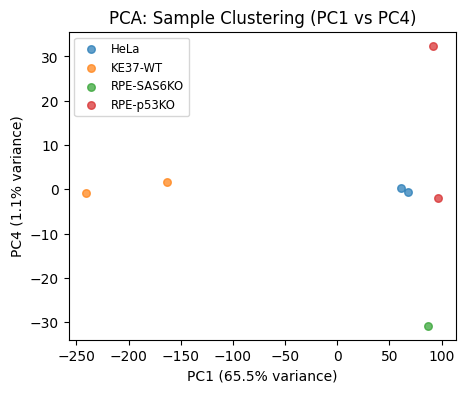

In [39]:
# pc6 vs pc7
plt.figure(figsize=(5, 4))
for cellline in pca_df['cell_line'].unique():
    mask = pca_df['cell_line'] == cellline
    plt.scatter(pca_df.loc[mask, 'PC1'], 
                pca_df.loc[mask, 'PC4'],
                label=cellline, s=30, alpha=0.7)
plt.xlabel(f'PC1 ({pca.explained_variance_ratio_[0]:.1%} variance)')
plt.ylabel(f'PC4 ({pca.explained_variance_ratio_[3]:.1%} variance)')
plt.title('PCA: Sample Clustering (PC1 vs PC4)')
plt.legend(loc='best', fontsize='small')

In [40]:
# Get genes driving centriole-specific variance
pc4_loadings = pd.DataFrame({
    'gene': counts_filtered.index,
    'PC4_loading': pca.components_[3]  # PC4 is the 4th component (index 3)
})
pc4_loadings.set_index('gene', inplace=True)


In [41]:
pc4_loadings_sorted = pc4_loadings.reindex(
    pc4_loadings['PC4_loading'].abs().sort_values(ascending=False).index
)

# Top 100 genes contributing to PC4
top_pc4_genes = pc4_loadings_sorted.head(100)
print(top_pc4_genes)

                    PC4_loading
gene                           
ENSG00000205413.8      0.077513
ENSG00000118495.21     0.064036
ENSG00000213983.12     0.058264
ENSG00000028137.19     0.054839
ENSG00000249306.8     -0.047841
...                         ...
ENSG00000200087.1     -0.027044
ENSG00000117602.13     0.027034
ENSG00000106991.15     0.027012
ENSG00000119946.12     0.026993
ENSG00000132688.11    -0.026855

[100 rows x 1 columns]


In [56]:
top_pc4_genes.to_csv('/home/jiguo/SeqAna_Pipe/top_pc4_genes.txt', sep='\t', header=True)

In [ ]:
deg_52_genes = pd.read_csv('/home/jiguo/SeqAna_Pipe/all_significant_genes_RPE-p53KO_vs_Control_annotated.txt', sep='\t')['GeneSymbol'].tolist()

In [55]:
overlap = set(top_pc4_genes.index) & set(deg_52_genes)
print(f"Overlap: {len(overlap)} genes")

Overlap: 0 genes


### PCA on the 52 + 16 genes

In [45]:
centriole_samples = sample_info[(sample_info['condition']=='with_centrioles') & (sample_info['cell_line']=='RPE-p53KO')].index
control_samples = sample_info[sample_info['condition']=='without_centrioles'].index
# use CPM values
centriole_counts = log_cpm[centriole_samples]
control_counts = log_cpm[control_samples]

# calculate mean expression and fold change
mean_centrioles = centriole_counts.mean(axis=1)
control_expr = control_counts.mean(axis=1)
fold_change = mean_centrioles - control_expr
mean_expr = (mean_centrioles + control_expr) / 2

In [46]:
# save the list of significant genes
significant_genes = fold_change[(np.abs(fold_change) >= 1) & (mean_expr >= 5)]
# also save the mean expression values
significant_genes = pd.DataFrame({
    'Log2_Fold_Change': significant_genes,
    'Mean_Expression': mean_expr[significant_genes.index]
})
significant_genes.to_csv('/home/jiguo/SeqAna_Pipe/all_significant_genes_RPE-p53KO_vs_Control.txt', sep='\t', header=True)

In [50]:
# calculate pca matrix with the significant genes only
significant_gene_list = significant_genes.index.tolist()
log_cpm_significant = log_cpm.loc[significant_gene_list]
pca = PCA(n_components=7)
pca_result = pca.fit_transform(log_cpm_significant.T)  # transpose to have samples as rows
# Create PCA fataframe
pca_df = pd.DataFrame(
    data=pca_result, 
    columns=['PC1', 'PC2', 'PC3', 'PC4', 'PC5', 'PC6', 'PC7'], 
    index=log_cpm_significant.columns)
pca_df = pca_df.join(sample_info)

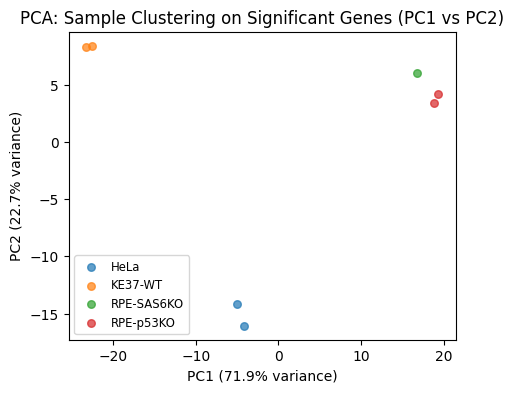

In [51]:
# plot PC1 vs PC2
plt.figure(figsize=(5, 4))
for cellline in pca_df['cell_line'].unique():
    mask = pca_df['cell_line'] == cellline
    plt.scatter(pca_df.loc[mask, 'PC1'], 
                pca_df.loc[mask, 'PC2'],
                label=cellline, s=30, alpha=0.7)
plt.xlabel(f'PC1 ({pca.explained_variance_ratio_[0]:.1%} variance)')
plt.ylabel(f'PC2 ({pca.explained_variance_ratio_[1]:.1%} variance)')
plt.title('PCA: Sample Clustering on Significant Genes (PC1 vs PC2)')
plt.legend(loc='best', fontsize='small')

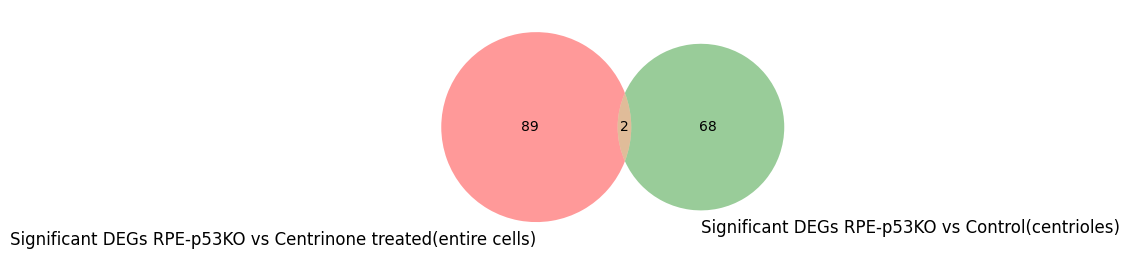

In [53]:
# plot a venn plot , a cycle has 68 genes and another has 89 genes, ovverlap is 2 genes
from matplotlib_venn import venn2
plt.figure(figsize=(5,5))
venn2(subsets = (89, 68, 2), set_labels = ('Significant DEGs RPE-p53KO vs Centrinone treated(entire cells)', 'Significant DEGs RPE-p53KO vs Control(centrioles)'))

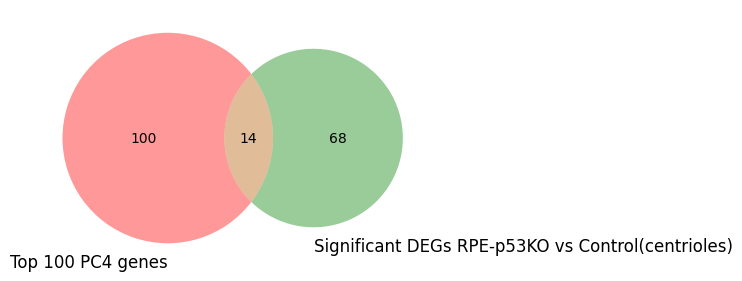

In [57]:
plt.figure(figsize=(5,5))
venn2(subsets = (100, 68, 14), set_labels = ('Top 100 PC4 genes', 'Significant DEGs RPE-p53KO vs Control(centrioles)'))
plt.show()